
1.  Consider a 5-year bond and a 30-year bond.  Suppose each has $1,000 face value and pays semi-annual coupons totaling 6% of face value per year.  Suppose the next coupon for each bond is six months away.  Compute and plot the prices of the bonds for yields in a grid of 0 to 12%.  Which price is most sensitive to the yield?


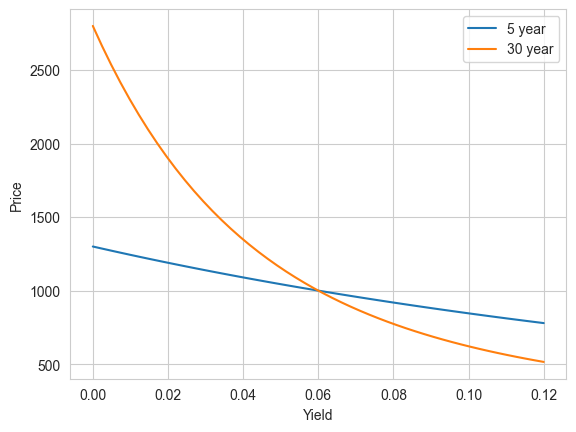

In [3]:
import numpy as np
prices5 = []
prices30 = []
grid = np.linspace(0, 0.12, 50)

for y in grid:

    # 5-year bond
    pv_factors = (1+y/2)**np.arange(-1, -11, -1)
    cash_flows = 30*np.ones(10)
    cash_flows[-1] += 1000
    price = np.sum(cash_flows * pv_factors)
    prices5.append(price)

    # 30-year bond
    pv_factors = (1+y/2)**np.arange(-1, -61, -1)
    cash_flows = 30*np.ones(60)
    cash_flows[-1] += 1000
    price = np.sum(cash_flows * pv_factors)
    prices30.append(price)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.plot(grid, prices5, label="5 year")
plt.plot(grid, prices30, label="30 year")
plt.legend()
plt.xlabel("Yield")
plt.ylabel("Price")
plt.show()

Answer: the 30-year bond price is most sensitive to its yield.

2. Compute the longest available history of monthly IEF returns using adjusted closing prices from Yahoo Finance. Get the Fed Funds rate from FRED (the name of the data is “FEDFUNDS”). Compute the monthlychange in the Fed Funds rate, and compute the correlation between the monthly change in the rate and the monthly (same month) IEF return.

In [4]:
import yfinance as yf
from pandas_datareader import DataReader as pdr

price = yf.download("IEF", start=1970)["Adj Close"]
price = price.resample("MS").first()
ief = price.pct_change().dropna()

fedfunds = pdr("FEdFunds", "fred", start=1970)
df = fedfunds.diff().dropna()
df.columns = ["delta_ff"]

df["ief"] = ief
df = df.dropna()
corr = df.ief.corr(df.delta_ff)
print(f"The correlation is {corr:.2%}")

[*********************100%%**********************]  1 of 1 completed
The correlation is -17.86%
